In [1]:
import pandas as pd
import os
import ast

model = "llama"
#model = "qwen2.5-math"

In [2]:
filepath = f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_entity_overlap_nonground.csv'
df = pd.read_csv(filepath)
df['matched_indices'] = df['matched_indices'].apply(ast.literal_eval)
df['dfs_search_order'] = df['dfs_search_order'].apply(ast.literal_eval)
df['bfs_search_order'] = df['bfs_search_order'].apply(ast.literal_eval)
df['efficient_search_order'] = df['efficient_search_order'].apply(ast.literal_eval)

In [3]:
# Filter out the responses where the model is correct
filtered_df = df[df.apply(lambda x: x["model_answer"] == x["true_answer"], axis=1)]
filtered_df.head()

,id,problem,true_efficient_cot,true_answer,model_answer,accuracy,model_reasoning_steps,gt_reasoning_steps,model_cot,gt_cot_enumerated,matched_indices,dfs_search_order,bfs_search_order,efficient_search_order,step_matches,num_matches,num_steps,match_ratio
0,0,Aubrey possesses 12 dogs. Wilhelmine possesses...,Aubrey possesses 12 dogs. Decca has 15 dogs mo...,18,18,0.488,"['Aubrey possesses 12 dogs.', 'Wilhelmine poss...","['Aubrey possesses 12 dogs.', 'Wilhelmine poss...",\n1. Aubrey possesses 12 dogs.\n2. Wilhelmine...,1. Aubrey possesses 12 dogs.\n2. Wilhelmine po...,"[1, 2, 3, 4, -1, 3, -1, 5, 8, 9, 6, 7, 10, 11,...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 6, 7, 8, 10, 12, 14, 5, 11, 13, 1...","[1, 3, 4, 5, 8, 9]","[True, True, True, True, False, True, False, T...",16,18,0.888889
1,1,Ellerey has 84 erasers. Ravid has 76 erasers. ...,Meghan has 17 erasers. Marlee has 5 erasers fe...,29,29,0.488,"['Ellerey has 84 erasers.', 'Ellerey then dona...","['Ellerey has 84 erasers.', 'Ravid has 76 eras...",\n1. Ellerey has 84 erasers.\n2. Ellerey then...,1. Ellerey has 84 erasers.\n2. Ravid has 76 er...,"[1, 3, 4, 2, 7, 8, 5, 11, 12, 6, 9, 10, -1, 14]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","[1, 2, 3, 5, 6, 7, 9, 11, 13, 4, 8, 10, 12, 14]","[6, 9, 10, 13, 14]","[True, True, True, True, True, True, True, Tru...",13,14,0.928571
2,2,Sela possesses 18 furniture stores. Sela posse...,Sela possesses 18 furniture stores. Sela posse...,197,197,0.488,"['Sela possesses 18 furniture stores.', 'Sela ...","['Sela possesses 18 furniture stores.', 'Sela ...",\n1. Sela possesses 18 furniture stores.\n2. ...,1. Sela possesses 18 furniture stores.\n2. Sel...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, -1, -1, 5, -1, -1,...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 4, 5, 6, 7, 9, 11, 13, 14, 15, 17, 3, 8...","[1, 2, 3, 5, 9, 10, 13, 17, 18, 19]","[True, True, True, True, True, True, True, Tru...",23,28,0.821429
4,4,Sheree possesses 15 lettuces. Sherie then give...,Sheree possesses 15 lettuces. Sherie then give...,43,43,0.488,"['Sheree possesses 15 lettuces.', 'Sherie then...","['Sheree possesses 15 lettuces.', 'Sherie then...",We need to find the total number of vegetable...,1. Sheree possesses 15 lettuces.\n2. Sherie th...,"[1, 2, 3, 4, 5, 6, 7, 13, 14, 15, 18, 19]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 4, 5, 7, 8, 9, 11, 12, 13, 15, 16, 18, ...","[1, 2, 3, 4, 5, 6, 7, 13, 14, 15, 18, 19, 20]","[True, True, True, True, True, True, True, Tru...",12,12,1.000000
5,5,Winston has 17 desks. Wilfred has 54 desks. Da...,Winston has 17 desks. Daile has 2 desks more t...,12,12,0.488,['The number of desks that Winston has more th...,"['Winston has 17 desks.', 'Wilfred has 54 desk...","This problem is quite complex, so we'll break...",1. Winston has 17 desks.\n2. Wilfred has 54 de...,"[5, 3, -1, 6, 17, 13, -1, 18]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 7, 8, 9, 11, 13, 15, 17, 6, 10...","[1, 3, 5, 6, 7, 13, 14, 17, 18]","[True, True, False, True, True, True, False, T...",6,8,0.750000


In [4]:
def compute_precision(row):
    overlap = len(set(row["efficient_search_order"]).intersection(set(row["matched_indices"])))
    return overlap / len(row["matched_indices"]) if len(row["matched_indices"]) > 0 else 0

def compute_recall(row):
    overlap = len(set(row["efficient_search_order"]).intersection(set(row["matched_indices"])))
    return overlap / len(row["efficient_search_order"]) if len(row["efficient_search_order"]) > 0 else 0

def compute_exact_match(row):
    return int(row["efficient_search_order"] == row["matched_indices"])

filtered_df["precision"] = filtered_df.apply(compute_precision, axis=1)
filtered_df["recall"] = filtered_df.apply(compute_recall, axis=1)
filtered_df["exact_match"] = filtered_df.apply(compute_exact_match, axis=1)
filtered_df.head()

/tmp/ipykernel_178386/687411528.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["precision"] = filtered_df.apply(compute_precision, axis=1)
/tmp/ipykernel_178386/687411528.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["recall"] = filtered_df.apply(compute_recall, axis=1)
/tmp/ipykernel_178386/687411528.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,id,problem,true_efficient_cot,true_answer,model_answer,accuracy,model_reasoning_steps,gt_reasoning_steps,model_cot,gt_cot_enumerated,...,dfs_search_order,bfs_search_order,efficient_search_order,step_matches,num_matches,num_steps,match_ratio,precision,recall,exact_match
0,0,Aubrey possesses 12 dogs. Wilhelmine possesses...,Aubrey possesses 12 dogs. Decca has 15 dogs mo...,18,18,0.488,"['Aubrey possesses 12 dogs.', 'Wilhelmine poss...","['Aubrey possesses 12 dogs.', 'Wilhelmine poss...",\n1. Aubrey possesses 12 dogs.\n2. Wilhelmine...,1. Aubrey possesses 12 dogs.\n2. Wilhelmine po...,...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 6, 7, 8, 10, 12, 14, 5, 11, 13, 1...","[1, 3, 4, 5, 8, 9]","[True, True, True, True, False, True, False, T...",16,18,0.888889,0.333333,1.000000,0
1,1,Ellerey has 84 erasers. Ravid has 76 erasers. ...,Meghan has 17 erasers. Marlee has 5 erasers fe...,29,29,0.488,"['Ellerey has 84 erasers.', 'Ellerey then dona...","['Ellerey has 84 erasers.', 'Ravid has 76 eras...",\n1. Ellerey has 84 erasers.\n2. Ellerey then...,1. Ellerey has 84 erasers.\n2. Ravid has 76 er...,...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","[1, 2, 3, 5, 6, 7, 9, 11, 13, 4, 8, 10, 12, 14]","[6, 9, 10, 13, 14]","[True, True, True, True, True, True, True, Tru...",13,14,0.928571,0.285714,0.800000,0
2,2,Sela possesses 18 furniture stores. Sela posse...,Sela possesses 18 furniture stores. Sela posse...,197,197,0.488,"['Sela possesses 18 furniture stores.', 'Sela ...","['Sela possesses 18 furniture stores.', 'Sela ...",\n1. Sela possesses 18 furniture stores.\n2. ...,1. Sela possesses 18 furniture stores.\n2. Sel...,...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 4, 5, 6, 7, 9, 11, 13, 14, 15, 17, 3, 8...","[1, 2, 3, 5, 9, 10, 13, 17, 18, 19]","[True, True, True, True, True, True, True, Tru...",23,28,0.821429,0.357143,1.000000,0
4,4,Sheree possesses 15 lettuces. Sherie then give...,Sheree possesses 15 lettuces. Sherie then give...,43,43,0.488,"['Sheree possesses 15 lettuces.', 'Sherie then...","['Sheree possesses 15 lettuces.', 'Sherie then...",We need to find the total number of vegetable...,1. Sheree possesses 15 lettuces.\n2. Sherie th...,...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 4, 5, 7, 8, 9, 11, 12, 13, 15, 16, 18, ...","[1, 2, 3, 4, 5, 6, 7, 13, 14, 15, 18, 19, 20]","[True, True, True, True, True, True, True, Tru...",12,12,1.000000,1.000000,0.923077,0
5,5,Winston has 17 desks. Wilfred has 54 desks. Da...,Winston has 17 desks. Daile has 2 desks more t...,12,12,0.488,['The number of desks that Winston has more th...,"['Winston has 17 desks.', 'Wilfred has 54 desk...","This problem is quite complex, so we'll break...",1. Winston has 17 desks.\n2. Wilfred has 54 de...,...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 7, 8, 9, 11, 13, 15, 17, 6, 10...","[1, 3, 5, 6, 7, 13, 14, 17, 18]","[True, True, False, True, True, True, False, T...",6,8,0.750000,0.750000,0.666667,0


In [5]:
def get_summary_stats(filepath):
    df = pd.read_csv(filepath)
    df['matched_indices'] = df['matched_indices'].apply(ast.literal_eval)
    df['dfs_search_order'] = df['dfs_search_order'].apply(ast.literal_eval)
    df['bfs_search_order'] = df['bfs_search_order'].apply(ast.literal_eval)
    df['efficient_search_order'] = df['efficient_search_order'].apply(ast.literal_eval)
    
    df = df[df.apply(lambda x: x["model_answer"] == x["true_answer"], axis=1)]

    df["precision"] = df.apply(compute_precision, axis=1)
    df["recall"] = df.apply(compute_recall, axis=1)
    df["exact_match"] = df.apply(compute_exact_match, axis=1)

    print("Avg precision:", df["precision"].mean())
    print("Avg recall:", df["recall"].mean())
    print("Num exact matches:", int(df["exact_match"].mean() * len(df)))

In [6]:
filepath = f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_no_overlap_nonground.csv'
print("--- No Overlap ---")
get_summary_stats(filepath)

filepath = f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_entity_overlap_nonground.csv'
print("--- Entity Overlap ---")
get_summary_stats(filepath)

filepath = f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_agent_overlap_nonground.csv'
print("--- Agent Overlap ---")
get_summary_stats(filepath)

filepath = f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_agent_entity_overlap_nonground.csv'
print("--- Agent and Entity Overlap ---")
get_summary_stats(filepath)

--- No Overlap ---
Avg precision: 0.6022213087988867
Avg recall: 0.8450976976787987
Num exact matches: 15
--- Entity Overlap ---
Avg precision: 0.4353155036021691
Avg recall: 0.8286676619015604
Num exact matches: 3
--- Agent Overlap ---
Avg precision: 0.4753945857984136
Avg recall: 0.8595628271630008
Num exact matches: 4
--- Agent and Entity Overlap ---
Avg precision: 0.3395309838735507
Avg recall: 0.8538755249154536
Num exact matches: 0


In [7]:
## one way ANOVA test 
from scipy.stats import f_oneway

df1 = pd.read_csv(f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_no_overlap_nonground.csv')
df1["group"] = "none"
df2 = pd.read_csv(f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_entity_overlap_nonground.csv')
df2["group"] = "entity"
df3 = pd.read_csv(f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_agent_overlap_nonground.csv')
df3["group"] = "agent"
df4 = pd.read_csv(f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_agent_entity_overlap_nonground.csv')
df4["group"] = "both"

df = pd.concat([df1,df2,df3,df4])

df['matched_indices'] = df['matched_indices'].apply(ast.literal_eval)
df['dfs_search_order'] = df['dfs_search_order'].apply(ast.literal_eval)
df['bfs_search_order'] = df['bfs_search_order'].apply(ast.literal_eval)
df['efficient_search_order'] = df['efficient_search_order'].apply(ast.literal_eval)

df = df[df.apply(lambda x: x["model_answer"] == x["true_answer"], axis=1)]

df["precision"] = df.apply(compute_precision, axis=1)
df["recall"] = df.apply(compute_recall, axis=1)
df["exact_match"] = df.apply(compute_exact_match, axis=1)

grouped = df.groupby('group')['precision'].apply(list)
f_stat, p_value = f_oneway(*grouped)
print("F-statistic (precision):", f_stat)
print("p-value (precision):", p_value)

grouped = df.groupby('group')['recall'].apply(list)
f_stat, p_value = f_oneway(*grouped)
print("F-statistic (recall):", f_stat)
print("p-value (recall):", p_value)

F-statistic (precision): 54.90226607211318
p-value (precision): 2.4635796952105536e-32
F-statistic (recall): 1.7132650811009886
p-value (recall): 0.16274229880075197


In [8]:
# GROUND QUERIES

filepath = f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_no_overlap_ground.csv'
print("--- No Overlap ---")
get_summary_stats(filepath)

filepath = f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_entity_overlap_ground.csv'
print("--- Entity Overlap ---")
get_summary_stats(filepath)

filepath = f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_agent_overlap_ground.csv'
print("--- Agent Overlap ---")
get_summary_stats(filepath)

filepath = f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_agent_entity_overlap_ground.csv'
print("--- Agent and Entity Overlap ---")
get_summary_stats(filepath)

--- No Overlap ---
Avg precision: 0.45313862199097255
Avg recall: 0.7598493666231985
Num exact matches: 11
--- Entity Overlap ---
Avg precision: 0.3485322748667297
Avg recall: 0.7783201950579686
Num exact matches: 9
--- Agent Overlap ---
Avg precision: 0.29850113238157394
Avg recall: 0.7207224415318669
Num exact matches: 7
--- Agent and Entity Overlap ---
Avg precision: 0.23581706536414057
Avg recall: 0.6981233715566786
Num exact matches: 11


In [9]:
## one way ANOVA test 
from scipy.stats import f_oneway

df1 = pd.read_csv(f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_no_overlap_ground.csv')
df1["group"] = "none"
df2 = pd.read_csv(f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_entity_overlap_ground.csv')
df2["group"] = "entity"
df3 = pd.read_csv(f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_agent_overlap_ground.csv')
df3["group"] = "agent"
df4 = pd.read_csv(f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_agent_entity_overlap_ground.csv')
df4["group"] = "both"

df = pd.concat([df1,df2,df3,df4])

df['matched_indices'] = df['matched_indices'].apply(ast.literal_eval)
df['dfs_search_order'] = df['dfs_search_order'].apply(ast.literal_eval)
df['bfs_search_order'] = df['bfs_search_order'].apply(ast.literal_eval)
df['efficient_search_order'] = df['efficient_search_order'].apply(ast.literal_eval)

df = df[df.apply(lambda x: x["model_answer"] == x["true_answer"], axis=1)]

df["precision"] = df.apply(compute_precision, axis=1)
df["recall"] = df.apply(compute_recall, axis=1)
df["exact_match"] = df.apply(compute_exact_match, axis=1)

grouped = df.groupby('group')['precision'].apply(list)
f_stat, p_value = f_oneway(*grouped)
print("F-statistic (precision):", f_stat)
print("p-value (precision):", p_value)

grouped = df.groupby('group')['recall'].apply(list)
f_stat, p_value = f_oneway(*grouped)
print("F-statistic (recall):", f_stat)
print("p-value (recall):", p_value)

F-statistic (precision): 53.882122206623976
p-value (precision): 3.0266737973787205e-33
F-statistic (recall): 12.681310186420673
p-value (recall): 3.3862661170941735e-08


## Analysis only on non-axioms

In [94]:
from data_processing import *

def get_conclusion_indices(datapath="data/test500.json", overlap_type="no_overlap"):
    data = load_json_to_dict(datapath)
    res = []
    for idx in range(len(data)):
        example = data[idx]['disconnected']['more_complex'][overlap_type]["rt"]
        conclusions = [i+1 for i, x in enumerate(example) if x["type"]=="conclusion"]
        res.append(conclusions)
    return res

def load_results(filepath):
    df = pd.read_csv(filepath)
    df['matched_indices'] = df['matched_indices'].apply(ast.literal_eval)
    df['dfs_search_order'] = df['dfs_search_order'].apply(ast.literal_eval)
    df['bfs_search_order'] = df['bfs_search_order'].apply(ast.literal_eval)
    df['efficient_search_order'] = df['efficient_search_order'].apply(ast.literal_eval)
    return df

def compute_precision_conclusions(row):
    
    efficient = [i for i in row["efficient_search_order"] if i in row["conclusion_indices"]]
    matched = [i for i in row["matched_indices"] if i in row["conclusion_indices"]]
    
    overlap = len(set(efficient).intersection(set(matched)))
    return overlap / len(matched) if len(matched) > 0 else 0

def get_precision_conclusions(df):
    df = df[df.apply(lambda x: x["model_answer"] == x["true_answer"], axis=1)]

    df["precision_conclusions"] = df.apply(compute_precision_conclusions, axis=1)
    print("Avg precision (conclusions):", df["precision_conclusions"].mean())
    return df

In [95]:
print(model)
filepath = f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_no_overlap_ground.csv'
df = load_results(filepath)
df["conclusion_indices"] = get_conclusion_indices(overlap_type="no_overlap")
df = get_precision_conclusions(df)
df.head(10)


llama
Avg precision (conclusions): 0.5759019618753171


/tmp/ipykernel_178386/3336209198.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["precision_conclusions"] = df.apply(compute_precision_conclusions, axis=1)


,id,problem,true_efficient_cot,true_answer,model_answer,accuracy,model_reasoning_steps,gt_reasoning_steps,model_cot,gt_cot_enumerated,matched_indices,dfs_search_order,bfs_search_order,efficient_search_order,step_matches,num_matches,num_steps,match_ratio,conclusion_indices,precision_conclusions
0,0,Aubrey possesses 12 dogs. Charlie possesses 78...,Aubrey possesses 12 dogs. Decca has 15 dogs mo...,18,18,0.85,"['Aubrey possesses 12 dogs.', ""Decca has 15 do...","['Aubrey possesses 12 dogs.', 'Charlie possess...",\n1. Aubrey possesses 12 dogs.\n2. Decca has ...,1. Aubrey possesses 12 dogs.\n2. Charlie posse...,"[1, 3, 4, 9]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 6, 7, 8, 10, 12, 14, 5, 11, 13, 1...","[1, 3, 4, 5, 8, 9]","[True, True, True, True]",4,4,1.000000,"[5, 9, 11, 13, 15]",1.000000
1,1,Amberly has 84 balloons. Lutero has 76 toy car...,Meghan has 17 erasers. Marlee has 5 erasers fe...,29,29,0.85,"['Amberly has 84 balloons.', 'Amberly then don...","['Amberly has 84 balloons.', 'Lutero has 76 to...",\n1. Amberly has 84 balloons.\n2. Amberly the...,1. Amberly has 84 balloons.\n2. Lutero has 76 ...,"[1, 3, 4, 2, 7, 8, 5, 11, 12, 6, 9, 10, 13, 14]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","[1, 2, 3, 5, 6, 7, 9, 11, 13, 4, 8, 10, 12, 14]","[6, 9, 10, 13, 14]","[True, True, True, True, True, True, True, Tru...",14,14,1.000000,"[4, 8, 10, 12, 14]",0.400000
2,2,Sela possesses 18 furniture stores. Sela posse...,Sela possesses 18 furniture stores. Sela posse...,197,197,0.85,"['Sela possesses 18 furniture stores.', 'Sela ...","['Sela possesses 18 furniture stores.', 'Sela ...",We need to find the total number of cabinets ...,1. Sela possesses 18 furniture stores.\n2. Sel...,"[1, 2, 3, 5, 9, 10, 17, 13, 18, 19]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 4, 5, 6, 7, 9, 11, 13, 14, 15, 17, 3, 8...","[1, 2, 3, 5, 9, 10, 13, 17, 18, 19]","[True, True, True, True, True, True, True, Tru...",10,10,1.000000,"[3, 8, 10, 12, 16, 18, 19]",1.000000
3,3,Booth owns 14 pet stores. Brennen owns 58 plan...,Booth owns 14 pet stores. Booth then gives Mor...,189,189,0.85,['Booth owns 14 pet stores and has 19 hamsters...,"['Booth owns 14 pet stores.', 'Brennen owns 58...",We will break down the problem into smaller p...,1. Booth owns 14 pet stores.\n2. Brennen owns ...,"[1, -1, 3, 4, 6, 7, 8, 9, 10, 11, 18, -1, 13, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 5, 7, 8, 10, 12, 13, 14, 16, 18, 20,...","[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 16, 17, 1...","[True, False, True, True, True, True, True, Tr...",43,52,0.826923,"[4, 6, 9, 11, 15, 17, 19, 22, 24, 28, 30, 33, ...",0.500000
4,4,Sheree possesses 15 lettuces. Sherie then give...,Sheree possesses 15 lettuces. Sherie then give...,43,43,0.85,"['Sheree possesses 15 lettuces.', 'Sherie then...","['Sheree possesses 15 lettuces.', 'Sherie then...","To solve this problem, we need to find the to...",1. Sheree possesses 15 lettuces.\n2. Sherie th...,"[1, 2, 3, 4, 5, 6, 7, 13, 14, -1, 15, 18, 19, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 4, 5, 7, 8, 9, 11, 12, 13, 15, 16, 18, ...","[1, 2, 3, 4, 5, 6, 7, 13, 14, 15, 18, 19, 20]","[True, True, True, True, True, True, True, Tru...",12,15,0.800000,"[3, 6, 10, 14, 17, 19, 20, 22]",1.000000
5,5,Winston has 17 desks. Maddie has 54 towels. Da...,Winston has 17 desks. Daile has 2 desks more t...,12,12,0.85,"['Winston has 17 desks.', 'Maddie has 54 towel...","['Winston has 17 desks.', 'Maddie has 54 towel...",This problem has multiple pieces of informati...,1. Winston has 17 desks.\n2. Maddie has 54 tow...,"[1, 2, 3, 4, 7, 8, 9, 11, 13, 15, 5, 17]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 7, 8, 9, 11, 13, 15, 17, 6, 10...","[1, 3, 5, 6, 7, 13, 14, 17, 18]","[True, True, True, True, True, True, True, Tru...",12,12,1.000000,"[6, 10, 12, 14, 16, 18]",0.000000
6,6,Felike possesses 18 calculators. Felic has 10 ...,Felike possesses 18 calculators. Felic has 

In [96]:
## one way ANOVA test 
from scipy.stats import f_oneway

df1 = load_results(f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_no_overlap_nonground.csv')
df1["conclusion_indices"] = get_conclusion_indices(overlap_type="no_overlap")
df1["group"] = "none"
df2 = load_results(f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_entity_overlap_nonground.csv')
df2["conclusion_indices"] = get_conclusion_indices(overlap_type="entity_overlap")
df2["group"] = "entity"
df3 = load_results(f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_agent_overlap_nonground.csv')
df3["conclusion_indices"] = get_conclusion_indices(overlap_type="agent_overlap")
df3["group"] = "agent"
df4 = load_results(f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_agent_entity_overlap_nonground.csv')
df4["conclusion_indices"] = get_conclusion_indices(overlap_type="agent_entity_overlap")
df4["group"] = "both"

df = pd.concat([df1,df2,df3,df4])

df["precision_conclusions"] = df.apply(compute_precision_conclusions, axis=1)

grouped = df.groupby('group')['precision_conclusions'].apply(list)
f_stat, p_value = f_oneway(*grouped)
print("F-statistic (precision conclusions):", f_stat)
print("p-value (precision conclusions):", p_value)

## ground queries 

df1 = load_results(f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_no_overlap_ground.csv')
df1["conclusion_indices"] = get_conclusion_indices(overlap_type="no_overlap")
df1["group"] = "none"
df2 = load_results(f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_entity_overlap_ground.csv')
df2["conclusion_indices"] = get_conclusion_indices(overlap_type="entity_overlap")
df2["group"] = "entity"
df3 = load_results(f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_agent_overlap_ground.csv')
df3["conclusion_indices"] = get_conclusion_indices(overlap_type="agent_overlap")
df3["group"] = "agent"
df4 = load_results(f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_agent_entity_overlap_ground.csv')
df4["conclusion_indices"] = get_conclusion_indices(overlap_type="agent_entity_overlap")
df4["group"] = "both"

df = pd.concat([df1,df2,df3,df4])

df["precision_conclusions"] = df.apply(compute_precision_conclusions, axis=1)

grouped = df.groupby('group')['precision_conclusions'].apply(list)
f_stat, p_value = f_oneway(*grouped)
print("F-statistic (precision conclusions):", f_stat)
print("p-value (precision conclusions):", p_value)

F-statistic (precision conclusions): 63.96805732840777
p-value (precision conclusions): 1.729541590572578e-39
F-statistic (precision conclusions): 31.513593676838557
p-value (precision conclusions): 6.706123132300797e-20


## Edit distance

In [18]:
from Levenshtein import distance
import string
#distance("123456", "147526")
distance("A", "A")


0

In [ ]:
def remove_axioms(df):
    df["axioms"] = df["problem"].apply(lambda p: {f"{ax.strip()}." for ax in p.split(".") if len(ax) > 0 and "Prove " not in ax and "?" not in ax})
    df["axiom_step_idx"] = df.apply(lambda row: {i+1 for i,atom in enumerate(ast.literal_eval(row["gt_reasoning_steps"])) if atom in row["axioms"]}, axis=1)

    df["dfs_search_order"] = df.apply(lambda row: [idx for idx in row["dfs_search_order"] if idx not in row["axiom_step_idx"]], axis=1)
    df["bfs_search_order"] = df.apply(lambda row: [idx for idx in row["bfs_search_order"] if idx not in row["axiom_step_idx"]], axis=1)
    df["efficient_search_order"] = df.apply(lambda row: [idx for idx in row["efficient_search_order"] if idx not in row["axiom_step_idx"]], axis=1)
    df["matched_indices"] = df.apply(lambda row: [idx for idx in row["matched_indices"] if idx not in row["axiom_step_idx"]], axis=1)
    return df

In [19]:
from Levenshtein import distance
import pylcs

chars = list(string.ascii_uppercase + string.ascii_lowercase + string.digits)
char_map = {i: chars[i] for i in range(1, len(chars))}
char_map[-1] = "A"
char_map

def compute_levenshtein(row, order):
    model_order = [char_map[i] for i in row["matched_indices"]]
    if order == "dfs":
        ref_order = [char_map[i] for i in row["dfs_search_order"]]
    elif order == "bfs":
        ref_order = [char_map[i] for i in row["bfs_search_order"]]
    elif order == "efficient":
        ref_order = [char_map[i] for i in row["efficient_search_order"]]
    longer_list = model_order if len(model_order) > len(ref_order) else ref_order
    return distance(model_order, ref_order)/len(longer_list)

def compute_lcs(row, order):
    model_order = "".join([str(i) if i != -1 else "x" for i in row["matched_indices"]])
    if order == "dfs":
        ref_order = [str(i) if i != -1 else "x" for i in row["dfs_search_order"]]
    elif order == "bfs":
        ref_order = [str(i) if i != -1 else "x" for i in row["bfs_search_order"]]
    elif order == "efficient":
        ref_order = [str(i) if i != -1 else "x" for i in row["efficient_search_order"]]
    ref_order = "".join(ref_order)
    return pylcs.lcs_sequence_length(model_order, ref_order)

In [ ]:
def get_order_stats(filepath):
    df = pd.read_csv(filepath)
    df['matched_indices'] = df['matched_indices'].apply(ast.literal_eval)

    df['dfs_search_order'] = df['dfs_search_order'].apply(ast.literal_eval)
    df['bfs_search_order'] = df['bfs_search_order'].apply(ast.literal_eval)
    df['efficient_search_order'] = df['efficient_search_order'].apply(ast.literal_eval)

    df = df[df.apply(lambda x: x["model_answer"] == x["true_answer"], axis=1)]
    df = remove_axioms(df)

    print("-Levenshtein distance (mean)-")
    print("DFS:", df.apply(compute_levenshtein, order="dfs", axis=1).mean())
    print("BFS:", df.apply(compute_levenshtein, order="bfs", axis=1).mean())
    print("Efficient DFS:", df.apply(compute_levenshtein, order="efficient", axis=1).mean())

    print("-Longest common subsequence (mean)-")
    print("DFS:", df.apply(compute_lcs, order="dfs", axis=1).mean())
    print("BFS:", df.apply(compute_lcs, order="bfs", axis=1).mean())
    print("Efficient DFS:", df.apply(compute_lcs, order="efficient", axis=1).mean())


In [88]:
filepath = f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_no_overlap_nonground.csv'
print("--- No Overlap ---")
get_order_stats(filepath)

filepath = f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_entity_overlap_nonground.csv'
print("--- Entity Overlap ---")
get_order_stats(filepath)

filepath = f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_agent_overlap_nonground.csv'
print("--- Agent Overlap ---")
get_order_stats(filepath)

filepath = f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_agent_entity_overlap_nonground.csv'
print("--- Agent and Entity Overlap ---")
get_order_stats(filepath)

--- No Overlap ---
-Levenshtein distance (mean)-
DFS: 0.6735174881166939
BFS: 0.6719574194487541
Efficient DFS: 0.5317419162760337
-Longest common subsequence (mean)-
DFS: 6.826086956521739
BFS: 6.818840579710145
Efficient DFS: 5.478260869565218
--- Entity Overlap ---
-Levenshtein distance (mean)-
DFS: 0.6091522490057106
BFS: 0.6271972222429453
Efficient DFS: 0.6681361442745213
-Longest common subsequence (mean)-
DFS: 8.942622950819672
BFS: 8.721311475409836
Efficient DFS: 5.483606557377049
--- Agent Overlap ---
-Levenshtein distance (mean)-
DFS: 0.6590789407158069
BFS: 0.6764693956492868
Efficient DFS: 0.6025690852249349
-Longest common subsequence (mean)-
DFS: 7.276470588235294
BFS: 7.064705882352941
Efficient DFS: 5.088235294117647
--- Agent and Entity Overlap ---
-Levenshtein distance (mean)-
DFS: 0.6277337838980963
BFS: 0.6419440688215083
Efficient DFS: 0.732573146237541
-Longest common subsequence (mean)-
DFS: 9.122137404580153
BFS: 8.992366412213741
Efficient DFS: 5.374045801526

In [89]:
# GROUND QUERIES

filepath = f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_no_overlap_ground.csv'
print("--- No Overlap ---")
get_order_stats(filepath)

filepath = f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_entity_overlap_ground.csv'
print("--- Entity Overlap ---")
get_order_stats(filepath)

filepath = f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_agent_overlap_ground.csv'
print("--- Agent Overlap ---")
get_order_stats(filepath)

filepath = f'results/parsed/{model}_matched_outputs_search_order/disconnected_more_complex_agent_entity_overlap_ground.csv'
print("--- Agent and Entity Overlap ---")
get_order_stats(filepath)


--- No Overlap ---
-Levenshtein distance (mean)-
DFS: 0.7515368776911244
BFS: 0.7594726132321912
Efficient DFS: 0.6787358528204349
-Longest common subsequence (mean)-
DFS: 7.249411764705882
BFS: 7.08235294117647
Efficient DFS: 5.291764705882353
--- Entity Overlap ---
-Levenshtein distance (mean)-
DFS: 0.7101617053401443
BFS: 0.7201182383766749
Efficient DFS: 0.7519066991336684
-Longest common subsequence (mean)-
DFS: 9.355504587155963
BFS: 9.13302752293578
Efficient DFS: 5.639908256880734
--- Agent Overlap ---
-Levenshtein distance (mean)-
DFS: 0.7992247274963561
BFS: 0.8003025770425639
Efficient DFS: 0.7834240222471648
-Longest common subsequence (mean)-
DFS: 7.907542579075426
BFS: 7.776155717761557
Efficient DFS: 5.182481751824818
--- Agent and Entity Overlap ---
-Levenshtein distance (mean)-
DFS: 0.8091197006925611
BFS: 0.8213470422758318
Efficient DFS: 0.8292597367009331
-Longest common subsequence (mean)-
DFS: 8.017241379310345
BFS: 7.701970443349754
Efficient DFS: 4.6970443349753

In [91]:
def make_order_stats(filepath):
    df = pd.read_csv(filepath)
    df['matched_indices'] = df['matched_indices'].apply(ast.literal_eval)
    df['dfs_search_order'] = df['dfs_search_order'].apply(ast.literal_eval)
    df['bfs_search_order'] = df['bfs_search_order'].apply(ast.literal_eval)
    df['efficient_search_order'] = df['efficient_search_order'].apply(ast.literal_eval)
    
    df = remove_axioms(df)
    
    df = df[df.apply(lambda x: x["model_answer"] == x["true_answer"], axis=1)]
    
    df["edit_dist_dfs"] = df.apply(compute_levenshtein, order="dfs", axis=1)
    df["edit_dist_bfs"] = df.apply(compute_levenshtein, order="bfs", axis=1)
    df["edit_dist_efficient"] = df.apply(compute_levenshtein, order="efficient", axis=1)

    return df

In [ ]:
get_conclusion_indices()

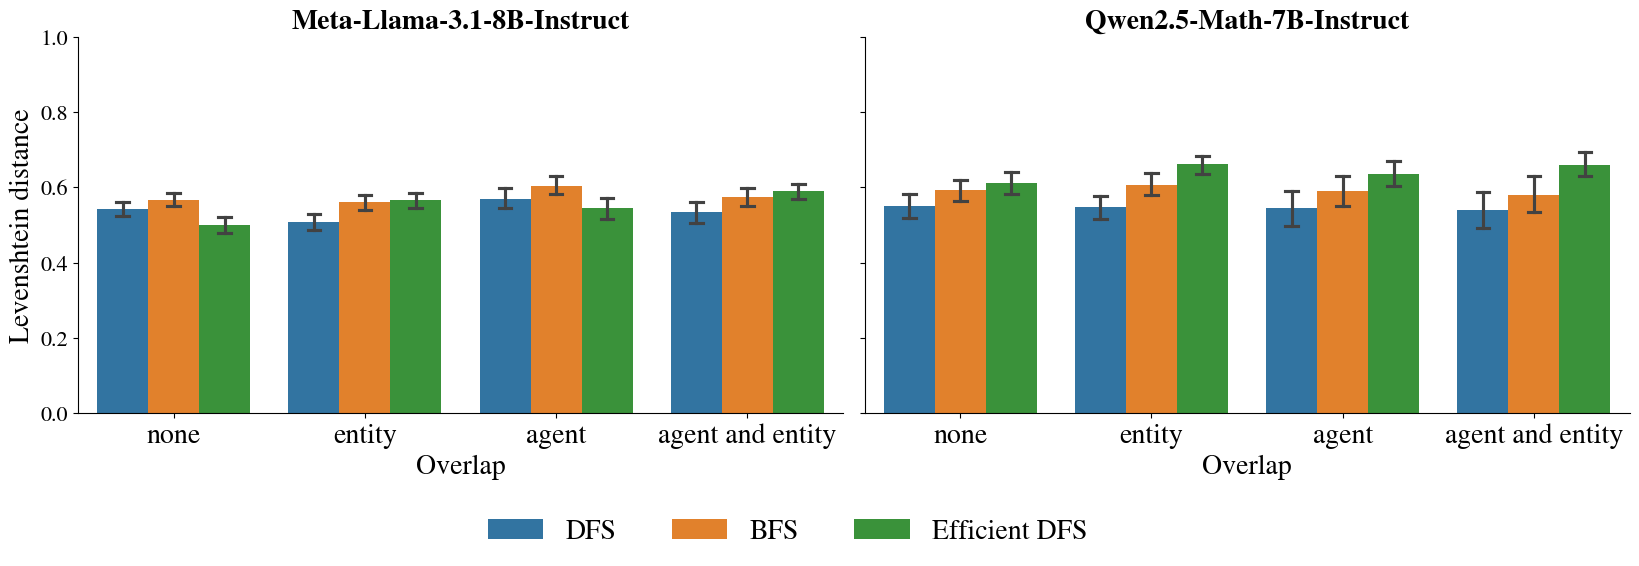

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

base_font_size = 20

# --- NeurIPS 2025-style fonts ---
plt.rcParams.update({
    "font.family": "STIXGeneral",     # serif font similar to Times New Roman
    "mathtext.fontset": "stix",
    "axes.unicode_minus": False,
})

llama_folder = "llama_matched_outputs_search_order_v2"
qwen_folder = "qwen2.5-math_matched_outputs_search_order_v2"

df1 = make_order_stats(f'results/parsed/{llama_folder}/disconnected_complex_no_overlap_nonground.csv')
df1["Overlap"] = "none"
df2 = make_order_stats(f'results/parsed/{llama_folder}/disconnected_complex_entity_overlap_nonground.csv')
df2["Overlap"] = "entity"
df3 = make_order_stats(f'results/parsed/{llama_folder}/disconnected_complex_agent_overlap_nonground.csv')
df3["Overlap"] = "agent"
df4 = make_order_stats(f'results/parsed/{llama_folder}/disconnected_complex_agent_entity_overlap_nonground.csv')
df4["Overlap"] = "agent and entity"
df = pd.concat([df1, df2, df3, df4])
df["Model"] = "Meta-Llama-3.1-8B-Instruct"
df1 = make_order_stats(f'results/parsed/{qwen_folder}/disconnected_complex_no_overlap_nonground.csv')
df1["Overlap"] = "none"
df2 = make_order_stats(f'results/parsed/{qwen_folder}/disconnected_complex_entity_overlap_nonground.csv')
df2["Overlap"] = "entity"
df3 = make_order_stats(f'results/parsed/{qwen_folder}/disconnected_complex_agent_overlap_nonground.csv')
df3["Overlap"] = "agent"
df4 = make_order_stats(f'results/parsed/{qwen_folder}/disconnected_complex_agent_entity_overlap_nonground.csv')
df4["Overlap"] = "agent and entity"
dfq = pd.concat([df1, df2, df3, df4])
dfq["Model"] = "Qwen2.5-Math-7B-Instruct"
df = pd.concat([df, dfq])

# plt.figure(figsize=(12, 6))
# g = sns.catplot(data=df, x='complexity_label', y='accuracy', hue='instantiation_label', kind='bar',
#             hue_order=['no overlap', 'entity overlap', 'agent overlap', 'agent and entity overlap'],
#             order=['w/ Axiom', 'w/ Tree', 'w/ Multiple Trees'], errorbar=None,
#             #palette='husl'
#             )
# g.set_titles("{col_name}", fontweight='bold', size=18)

# g.set_axis_labels("Complexity", "Accuracy", fontweight='bold', fontsize=16)
# sns.move_legend(g, "upper center", bbox_to_anchor=(.48, 0), ncol=4, title=None, frameon=False, fontsize=16)
# plt.tight_layout()
# plt.show()

df_melted = df.melt(
    id_vars=['Overlap', 'Model'],
    value_vars=['edit_dist_dfs', 'edit_dist_bfs', 'edit_dist_efficient'],
    var_name='edit_distance_type',
    value_name='Levenshtein distance'
)

# Create the catplot
g = sns.catplot(
    data=df_melted,
    x='Overlap',
    y='Levenshtein distance',
    hue='edit_distance_type',
    col='Model',
    kind='bar',  # or 'violin' or 'strip' depending on what you want
    capsize=0.2,
    height=5,
    aspect=1.5
)

g.set(ylim=(0, 1)) 
sns.move_legend(g, "upper center", bbox_to_anchor=(.48, 0), ncol=4, title=None, frameon=False, fontsize=base_font_size)
plt.xticks(rotation=45)
#plt.title("Levenshtein Distance by Overlap Category")
for t, label in zip(g._legend.texts, ["DFS", "BFS", "Efficient DFS"]):
    t.set_text(label)
g.set_xticklabels(fontsize=base_font_size)
#g.set_axis_labels(x="Overlap", y="Levenshtein distance", fontsize=12)
#plt.legend(["DFS", "BFS", "Efficient DFS"])
#g.set_axis_labels(fontdict={'fontsize': 16})
g.set_titles("{col_name}", fontweight='bold', size=base_font_size)
for ax in g.axes.flat:
    ax.set_ylabel("Levenshtein distance", fontsize=base_font_size)
    ax.set_xlabel("Overlap", fontsize=base_font_size)
    plt.setp(ax.get_xticklabels(), rotation=0)
    plt.setp(ax.get_yticklabels(), fontsize=base_font_size-4)
plt.tight_layout()
plt.show()

g.savefig("figures/search_comparison.pdf", dpi=500, bbox_inches='tight')

In [105]:
df1

,id,problem,true_efficient_cot,true_answer,model_answer,accuracy,model_reasoning_steps,gt_reasoning_steps,model_cot,gt_cot_enumerated,...,bfs_search_order,efficient_search_order,step_matches,num_matches,num_steps,match_ratio,edit_dist_dfs,edit_dist_bfs,edit_dist_efficient,overlap
0,0,Aubrey possesses 12 dogs. Charlie possesses 78...,Aubrey possesses 12 dogs. Decca has 15 dogs mo...,18,18,0.64,"['Aubrey possesses 12 dogs.', 'Charlie possess...","['Aubrey possesses 12 dogs.', 'Charlie possess...",\n1. Aubrey possesses 12 dogs.\n2. Charlie po...,1. Aubrey possesses 12 dogs.\n2. Charlie posse...,...,"[1, 2, 3, 4, 6, 8, 5, 9, 7]","[1, 3, 4, 5, 6, 7]","[True, True, True, True, False, False, True, T...",8,10,0.800000,0.300000,0.400000,0.666667,none
1,1,Amberly has 84 balloons. Amberly then donates ...,Meghan has 17 erasers. Marlee has 5 erasers fe...,29,29,0.64,"['Meghan has 17 erasers.', 'Marlee has 5 erase...","['Amberly has 84 balloons.', 'Amberly then don...","However, the question is about erasers, but t...",1. Amberly has 84 balloons.\n2. Amberly then d...,...,"[1, 2, 4, 5, 7, 3, 6, 8]","[4, 5, 6, 7, 8]","[True, True, True, True, True]",5,5,1.000000,0.600000,1.000000,0.000000,none
2,2,Sela possesses 18 furniture stores. Sela posse...,Sela possesses 18 furniture stores. Sela posse...,197,197,0.64,"['Sela possesses 18 furniture stores.', 'Sela ...","['Sela possesses 18 furniture stores.', 'Sela ...",\n1. Sela possesses 18 furniture stores.\n2. ...,1. Sela possesses 18 furniture stores.\n2. Sel...,...,"[1, 2, 4, 5, 6, 8, 10, 11, 3, 7, 9, 12, 13]","[1, 2, 3, 4, 8, 9, 10, 11, 12, 13]","[True, True, True, True, True, True, True, Tru...",11,11,1.000000,0.133333,0.352941,0.071429,none
4,4,Sheree possesses 15 lettuces. Sherie then give...,Sheree possesses 15 lettuces. Sherie then give...,43,43,0.64,"['Sheree possesses 15 lettuces.', 'Sherie then...","['Sheree possesses 15 lettuces.', 'Sherie then...",We need to find the total number of vegetable...,1. Sheree possesses 15 lettuces.\n2. Sherie th...,...,"[1, 2, 4, 5, 7, 8, 9, 11, 12, 15, 3, 6, 10, 13...","[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14]","[True, True, True, True, True, True, True, Tru...",15,20,0.750000,0.346154,0.565217,0.307692,none
5,5,Winston has 17 desks. Daile has 2 desks more t...,Winston has 17 desks. Daile has 2 desks more t...,12,12,0.64,['The number of desks that Winston has more th...,"['Winston has 17 desks.', 'Daile has 2 desks m...",\n1. The number of desks that Winston has mor...,1. Winston has 17 desks.\n2. Daile has 2 desks...,...,"[1, 2, 3, 5, 6, 7, 9, 11, 4, 8, 10, 12]","[1, 2, 3, 4, 5, 7, 8, 11, 12]","[True, True, False, True, True, True, False, T...",6,8,0.750000,1.000000,1.000000,0.700000,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,491,Mead owns 3 paintbrushes. Sherwin owns 64 toys...,Mead owns 3 paintbrushes. Mead has 15 paintbru...,78,78,0.64,"['Mead owns 3 paintbrushes.', 'Mead has 15 pai...","['Mead owns 3 paintbrushes.', 'Sherwin owns 64...",\n1. Mead owns 3 paintbrushes.\n2. Mead has 1...,1. Mead owns 3 paintbrushes.\n2. Sherwin owns ...,...,"[1, 2, 3, 5, 6, 7, 9, 11, 12, 14, 15, 4, 8, 10...","[1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17]","[True, True, True, True, True, False, False, T...",15,22,0.681818,0.379310,0.586207,0.379310,none
492,492,Rafferty has 18 biscuits. Heath has 4 biscuits...,Rafferty has 18 biscuits. Heath has 4 biscuits...,43,43,0.64,"['Rafferty has 18 biscuits.', 'Heath has 4 bis...","['Rafferty has 18 biscuits.', 'Heath has 4 bis...",We need to break down the problem into smalle...,1. Rafferty has 18 biscuits.\n2. Heath has 4 b...,...,"[1, 2, 3, 5, 6, 8, 9, 10, 12, 13, 4, 7, 11, 14...","[1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 14, 15]","[True, True, True, True, True, True, True, Tru...",11,11,1.000000,0.600000,0.666667,0.466667,none
493,493,Elisabeth has 7 paper bags. Ted has 90 strawbe...,Elisabeth has 7 paper bags. Elisabeth possesse...,50,50,0.64,"['Elisabeth has 7 paper bag